# 量化交易

<img src="https://pic2.zhimg.com/80/2b4b2c9286b5268255299cda9f74d34d_720w.jpg" >

## 输入

### 行情数据

先用行情数据进行预测，有了充足的财经知识了再嵌入财务数据、投资经验（值）和自定义数据。

获得全部股票的日线数据（tushare只能提供到日线，分钟级数据得从通达信客户端手动下载）

#### By *Tushare*
通过tushare获取个股和全部股票的日线行情/周线行情/月线行情

In [1]:
# 安装tushare
!pip install tushare

     |████████████████████████████████| 215kB 12.1MB/s 
     |████████████████████████████████| 133kB 22.2MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 


In [2]:
#加载tushare，版本必须大于1.2.10
import tushare as ts
#设置token

ts.set_token('********')   # 个人token从Tushare官网获取
#选取pro接口
pro = ts.pro_api()
#查询当前所有正常上市交易的股票列表
# data = pro.stock_basic(exchange='SSE', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
# print(data)
#读取股票日交易数据
df = pro.daily(ts_code='000001.SZ', start_date='20200101', end_date='20210224')
#显示
print(df.columns)

Index(['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close',
       'change', 'pct_chg', 'vol', 'amount'],
      dtype='object')


In [ ]:
# 获取个股的历史日线行情
import tushare as ts
all_data_one = ts.get_hist_data('000001') #一次性获取个股全部数据(该函数只能得到日线行情)
# 另外，参考get_k_data函数      get_k_data()获取关键的几个数据
# print(all_data_one)


# 获得个股的历史分钟线行情
df = ts.pro_bar(ts_code='600016.SH', freq='min', start_date='2021-02-026 09:00:00',\
                end_date='2021-03-01 17:00:00')
print(df.head())

In [ ]:
# Step_1 查询当前所有正常上市交易的股票列表
data = pro.query('stock_basic', exchange='SSE', list_status='L', \
                 fields='ts_code,symbol,name,area,industry,list_date')  #  暂时账号权限不够
print(data.head())
# data.to_csv('/content/drive/MyDrive/Quant/Data_input/Data_frequently_used/' + 'The_Stock_List.csv')

     ts_code  symbol  name area industry list_date
0  600000.SH  600000  浦发银行   上海       银行  19991110
1  600004.SH  600004  白云机场   广东       机场  20030428
2  600006.SH  600006  东风汽车   湖北     汽车整车  19990727
3  600007.SH  600007  中国国贸   北京     园区开发  19990312
4  600008.SH  600008  首创股份   北京     环境保护  20000427


In [ ]:
# Step_2 基于股票列表获取全部股票的历史日线行情
path_The_Stock_List = '/content/drive/MyDrive/Quant/Data_input/Data_frequently_used/' + 'The_Stock_List.csv'


#### By 通达信
在通达信客户端下载1分钟级和5分钟级的数据，转存到google cloud(MyDrive/Quant/Data_input/Data_tdx/...)，然后在Colab调用分析。地址为：

In [ ]:
# 需要编写按键精灵代码，每天定时运行


#### By 自主爬虫
仅仅针对个别股票预测，股票信息的总汇还是tushare和通达信更方便。

15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159
15:00:00 1.159


IndexError: ignored

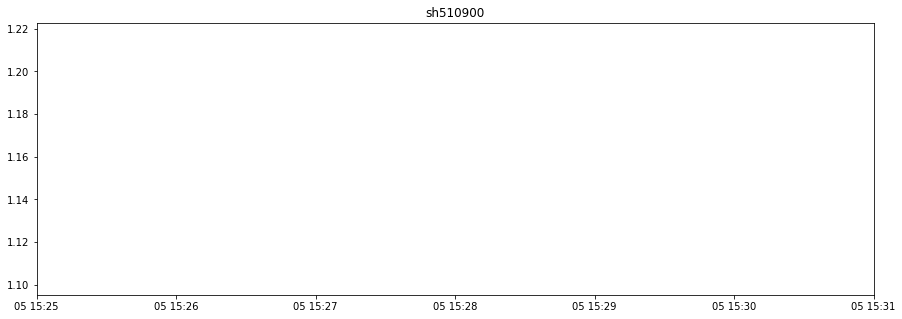

In [3]:
# 从新浪财经、雅虎财经等网页对自选股进行爬虫
# -*- coding: utf-8 -*-
 
import requests
import time as time_sleep
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
 
def getHTMLText(url):
    try:
        r = requests.get(url, timeout=30)
        r.raise_for_status()
        r.encoding = r.apparent_encoding  # 'utf-8' #
        return r.text
    except:
        return " "
 
 
def getData(data):
    data = data.split(',')
    # name = data[0]
    todayOpen = data[1]
    yesterdayClose = data[2]
    nowPrice = data[3]
    todayHigh = data[4]
    todayLow = data[5]
 
    bidPrice = data[6]
    askPrice = data[7]
    quantity = data[8]
    money = data[9]
 
    buy1Volume = data[10]
    buy1Price = data[11]
    buy2Volume = data[12]
    buy2Price = data[13]
    buy3Volume = data[14]
    buy3Price = data[15]
    buy4Volume = data[16]
    buy4Price = data[17]
    buy5Volume = data[18]
    buy5Price = data[19]
 
    sell1Volume = data[20]
    sell1Price = data[21]
    sell2Volume = data[22]
    sell2Price = data[23]
    sell3Volume = data[24]
    sell3Price = data[25]
    sell4Volume = data[26]
    sell4Price = data[27]
    sell5Volume = data[28]
    sell5Price = data[29]
 
    date = data[30]
    time = data[31]
 
    data = {'todayOpen': todayOpen, 'yesterdayClose': yesterdayClose, 'nowPrice': nowPrice, 'todayHigh': todayHigh,
            'todayLow': todayLow, 'bidPrice': bidPrice, 'askPrice': askPrice, 'quantity': quantity, 'money': money,
            'buy1Volume': buy1Volume, 'buy1Price': buy1Price, 'buy2Volume': buy2Volume, 'buy2Price': buy2Price,
            'buy3Volume': buy3Volume, 'buy3Price': buy3Price, 'buy4Volume': buy4Volume, 'buy4Price': buy4Price,
            'buy5Volume': buy5Volume, 'buy5Price': buy5Price, 'sell1Volume': sell1Volume, 'sell1Price': sell1Price,
            'sell2Volume': sell2Volume, 'sell2Price': sell2Price, 'sell3Volume': sell3Volume, 'sell3Price': sell3Price,
            'sell4Volume': sell4Volume, 'sell4Price': sell4Price, 'sell5Volume': sell5Volume, 'sell5Price': sell5Price,
            'date': date, 'time': time}
    return data
 
 
def main():
    code = r'sh510900'
    url = 'http://hq.sinajs.cn/list=' + code
    store_time = list()
    store_price = list()
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(1,1,1)
    plt.xlim((datetime(2021, 1, 5, 15, 25), datetime(2021, 1, 5, 15, 31)))
    while True:
        data = getHTMLText(url)
        data = getData(data)
        time = data['time']
        nowPrice = float(data['nowPrice'])
        store_time.append(time)
        store_price.append(nowPrice)
        Price = pd.DataFrame(store_price, index=store_time, columns=['price'])
        Price.index = pd.to_datetime(Price.index)   # 添加当日日期
        index = list(Price.index)
 
        if len(index) > 5:
            # plt.gca().xaxis.set_major_formattermm(mdates.DateFormatter('%m/%d/%Y %H:%M:%S'))
            # plt.xlim((datetime(2017, 1, 5, 9, 30), datetime(2017, 1, 5, 15, 31)))
            ax.plot(index[len(index) - 30:len(index) - 1:1], store_price[len(index) - 30:len(index) - 1:1])
            plt.title("%s" % code)
            # plt.pause(0.01)
 
        # time_sleep.sleep(1)
        print(data['time'], data['nowPrice'])
 
 
main()

In [4]:
# df = pd.DataFrame({'year': [], 'month': [2, 3], 'day': [4, 5]})
 
pd.to_datetime('13:03:35')

Timestamp('2021-05-06 13:03:35')

### 财务数据、自定义数据、投资经验（待定）

## 个股预测
（1、5、15分钟级）

针对个股进行单独建模，进行数据拟合，由一定时间长度（需要调参找出长度大小）的时间序列预测后续开盘价格，通 过历史数据进行验证。

**临时思考**：

可以统计股票上涨和跌落的“惯性”，如同奈奎斯特采样定理一样，数据分析的粒度小于这个“惯性”，数据分析就可以对股市这个动态系统做一个“充分”的建模（体现在股价走向这一个指标上），也即预测系统的反应速度快于股市就可以真正将高频操作的价值利用起来。

### 指定股票和数据处理

In [5]:
import pandas as pd
import numpy as np
 
def load_data(stock_code):
  '''
  加载、提取、重构数据
  '''
  path_data = '/content/drive/MyDrive/Quant/Data_input/Zixuangu/' + str(stock_code) + '.txt'
 
  # 加载股票数据（from google drive）,需要提前下载好数据，不能实时更新
  # path_data = '/content/drive/MyDrive/Quant/Data_input/Zixuangu/601577.txt'   # 1分钟级数据
 
 
  # 提取、重构数据
  YMD=[]; time=[]; KPJ=[]; ZGJ=[]; ZDJ=[]; SPJ=[]; CJL=[]; CJE=[]
  with open(path_data,encoding='unicode_escape') as f:
    data = f.readlines()[2:-1]
    for n_row in data:
      YMD.append(n_row.split(',')[0])
      time.append(n_row.split(',')[1])
      KPJ.append(float(n_row.split(',')[2]))
      ZGJ.append(float(n_row.split(',')[3]))
      ZDJ.append(float(n_row.split(',')[4]))
      SPJ.append(float(n_row.split(',')[5]))
      CJL.append(float(n_row.split(',')[6]))
      CJE.append(float(n_row.split(',')[7][:-1]))
 
  # print(time[-1])
 
  df = pd.DataFrame(index=range(len(data)), columns=['YMD','time','KPJ','ZGJ','ZDJ','SPJ','CJL','CJE'])
  df['YMD'] = YMD
  df['time'] = time
  df['KPJ'] = KPJ
  df['ZGJ'] = ZGJ
  df['ZDJ'] = ZDJ
  df['SPJ'] = SPJ
  df['CJL'] = CJL
  df['CJE'] = CJE
 
  # print(df.head())
  return YMD,df

### 构建单日型数据样本

In [6]:
def generate_sample(YMD,df):
  # 构建单日股票时序数据（也可构建任意时长的时序数据）
  X = []
  Y = []
  YMD_indexs = sorted(set(YMD))
  for index in YMD_indexs:
    # print(index)
    data_intraday = df.groupby(df['YMD']).get_group(index)
    X.append(data_intraday['SPJ'])   # 当日1分钟级收盘价序列
    Y.append(data_intraday.iloc[0,2])  # 当日开盘价（09：35）
    # print(data_intraday,'\n',X,'\n',Y)
    # break
  # 当日1分钟级收盘价序列与次日开盘价对应 
  X_ = X[:-1]
  Y_ = Y[1:]
  print(len(X_),len(Y_))
  return X_, Y_

### 划分train和test

In [7]:
import numpy as np
def generate_train_test(X_, Y_):
  # 划分训练集和测试集
  index_train = range(int(0.7*len(X_)))  # 将某一节点前的数据看作训练集，将该节点后的数据看作测试集，符合炒股逻辑
  print(sorted(index_train))
  index_test = list(set(range(len(X_))) - set(index_train))   # 列表取差集
  print(sorted(index_test))
 
  X_train = [X_[i] for i in index_train]
  Y_train = [Y_[i] for i in index_train]
  X_test = [X_[i] for i in index_test]
  Y_test = [Y_[i] for i in index_test]
 
  # 得到可以直接导入LSTM模型的X_train、y_train、X_test、y_test
  X_train = np.array(X_train).reshape(len(X_train),240,1)
  y_train = np.array(Y_train).reshape(len(Y_train),1)
  X_test = np.array(X_test).reshape(len(X_test),240,1)
  y_test = np.array(Y_test).reshape(len(Y_test),1)
 
  print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
  return X_train, y_train, X_test, y_test

### LSTM模型预测

65 65
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
(45, 240, 1) (45, 1) (20, 240, 1) (20, 1)
Epoch 1/100
45/45 - 17s - loss: 37.9353 - val_loss: 17.7812
Epoch 2/100
45/45 - 0s - loss: 4.0246 - val_loss: 1.6014
Epoch 3/100
45/45 - 0s - loss: 0.1849 - val_loss: 0.9420
Epoch 4/100
45/45 - 0s - loss: 0.1488 - val_loss: 1.0075
Epoch 5/100
45/45 - 0s - loss: 0.1533 - val_loss: 1.0028
Epoch 6/100
45/45 - 0s - loss: 0.1541 - val_loss: 1.0056
Epoch 7/100
45/45 - 0s - loss: 0.1551 - val_loss: 1.0079
Epoch 8/100
45/45 - 0s - loss: 0.1562 - val_loss: 1.0101
Epoch 9/100
45/45 - 0s - loss: 0.1569 - val_loss: 1.0127
Epoch 10/100
45/45 - 0s - loss: 0.1578 - val_loss: 1.0150
Epoch 11/100
45/45 - 0s - loss: 0.1585 - val_loss: 1.0176
Epoch 12/100
45/45 - 0s - loss: 0.1592 - val_loss: 1.0199
Epoch 13/1

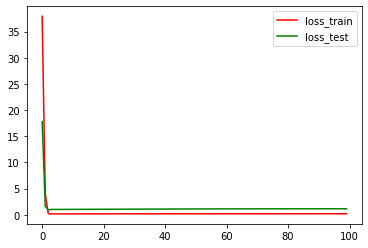

Test MSE: 1.130
Test MAE: 0.966
Test R2: -4.149
Test RMSE: 1.063
Accuracy: 0.000
totally cost 41.03519654273987


In [8]:
# 常规LSTM方法
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import LSTM
from tensorflow.compat.v1.keras.layers import Masking
from sklearn import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from math import sqrt,exp
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from keras.layers import CuDNNLSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
import matplotlib.pyplot as plt
import time
import pytz
from datetime import datetime
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
 
def bj_time():
  tz = pytz.timezone('Asia/Shanghai') #东八区
  t = datetime.fromtimestamp(int(time.time()),
    pytz.timezone('Asia/Shanghai')).strftime('%Y_%m_%d__%H_%M_%S %Z%z')
  beijing_time = t[:-9]
  return beijing_time
 
def Evaluate_Loss(train_X,train_y,test_X,test_y,EPOCHS,path_root):
  
  n_timesteps, n_features, n_outputs = train_X.shape[1], train_X.shape[2], train_y.shape[1]
  model = Sequential()
  model.add(CuDNNLSTM(50, input_shape=(n_timesteps, n_features)))
  # model.add(Dropout(0.5))
  # model.add(Dense(50, activation='relu'))
  model.add(Dense(n_outputs))
  model.compile(loss='mse', optimizer='adam')
  # fit network
  history = model.fit(train_X, train_y, epochs=EPOCHS, batch_size=1,\
              validation_data=(test_X, test_y), verbose=2, shuffle=False)
  print(history.history)
 
  # plot history
  plt.plot(history.history['loss'], label='loss_train',color='r')
  # plt.plot(history.history['accuracy'], label='accuracy_train',color='b')
  plt.plot(history.history['val_loss'], label='loss_test',color='g')
  # plt.plot(history.history['val_accuracy'], label='accuracy_test',color='p')
  plt.legend()
  plt.savefig(path_root + '/Loss/Figure/' + bj_time() + '__' + str(EPOCHS) + '__loss_and_val_loss_curve.svg')
  plt.savefig(path_root + '/Loss/Figure/' + bj_time() + '__' + str(EPOCHS) + '__loss_and_val_loss_curve.png')
  plt.show()
 
  # save model
  # 保存模型 model.save(file_path)
  LSTM_dir = '{}/Model/'.format(path_root) + bj_time() + '__' + str(EPOCHS) + '__' + 'LSTM_model.h5'
  model.save(LSTM_dir)
 
  # draw the diagram of model topology
  # 保存模型图
 
  # 需要安装pip install pydot
 
  LSTM_plot_dir = '{}/Model/model_Figure/'.format(path_root) + bj_time() + '__' + str(EPOCHS) + '__' + 'LSTM_model_Figure.png'
  plot_model(model, to_file=LSTM_plot_dir, show_shapes=True)
 
  # make a prediction
  pred_y = model.predict(test_X)
  # print(pred_y)
  # calculate MSE、MAE、R2、RSME、offical_score
  
  mse = mean_squared_error(test_y, pred_y)  # 此处的mse=history.history['val_loss'][-1]
  print('Test MSE: %.3f' % mse)
 
  mae = mean_absolute_error(test_y, pred_y)    
  print('Test MAE: %.3f' % mae)
 
  r2 = r2_score(test_y, pred_y)    
  print('Test R2: %.3f' % r2)
 
  rmse = sqrt(mean_squared_error(test_y, pred_y))    
  print('Test RMSE: %.3f' % rmse)
 
  count_number = 0
  for i in range(len(pred_y)):
    if abs(pred_y[i]-test_y[i][0])/test_y[i][0] <0.002:
    # if abs(pred_y[i]-test_y[i][0])<0.03:
      count_number = count_number + 1    
  acc = float(count_number)/len(pred_y)
  print('Accuracy: %.3f' % acc)
  # acc = 0.9
 
  loss_xcc = [(pred_y[i]-test_y[i][0])/test_y[i][0] for i in range(len(pred_y))]
 
  return rmse, mse, mae, r2, acc, loss_xcc, LSTM_dir
 
def main(stock_code):
  time_start = time.time()
 
  # 设置文件保存路径
  path_root = '/content/drive/MyDrive/Quant/Stock_pred'
  EPOCHS = 100
  # global EPOCHS
 
  
  YMD,df = load_data(stock_code)
  X_, Y_ = generate_sample(YMD,df)
  X_train, y_train, X_test, y_test = generate_train_test(X_, Y_)
 
  df_loss = pd.DataFrame(index = ['rmse', 'mse', 'mae', 'r2', 'Acc', 'Loss_xcc'])
  rmse, mse, mae, r2, acc, loss_xcc, LSTM_dir = Evaluate_Loss(X_train, y_train, X_test, y_test, EPOCHS, path_root)
  df_loss['Predictive_Index'] = [rmse, mse, mae, r2, acc, loss_xcc]
  df_loss.to_csv(path_root + bj_time() + '__' + str(EPOCHS) + '__LSTM_losses.csv')
 
  time_end=time.time()
  print('totally cost',time_end-time_start)
 
main(stock_code = str(601577))

### 模拟决策

In [9]:
import numpy as np
import h5py
from keras.models import load_model
 
YMD,df = load_data(stock_code)
X_, Y_ = generate_sample(YMD,df)
X_train, y_train, X_test, y_test = generate_train_test(X_, Y_)
 
# 加载模型
path_model = path_root + '/Model/2020_12_28__13_49_05__1000__LSTM_model.h5'  # 手动指定模型 
# path_model = LSTM_dir  # 自动指定最新模型
 
 
model = load_model(path_model)
 
# 模型可视化
# from keras.utils import plot_modelpred
# plot_model(model)
 
# 预测股价、进行决策、计算收益
Y_pred = model.predict(X_test)   # 预测股价
days_test = int(len(Y_test)*7/5)      # 对应test（不包括周末）的时间跨度
count_number = 0          # 交易执行计数
stock_yield_total = 0       # 收益累计
epsilon = 0.01          # 决策阈值，不能低于0.002是因为交易摩擦为2‰，多出的空间即为预设利润空间
rate_growth_test = [(Y_pred[i]-X_test[i][-1])/X_test[i][-1] for i in range(len(Y_test))] #股票收益增长率
growth_test = [Y_pred[i]-X_test[i][-1] for i in range(len(Y_test))]  # 当日买入，次日卖出，计算收益(绝对值，非相对值)
for i in range(len(Y_pred)):
  if rate_growth_test[i] >= epsilon:   # 如果预测股价能够增长0.2%，epsilon即为阈值,（相对值，非绝对值）    
    stock_yield_total += growth_test[i]
    count_number += 1 
 
Y_start_test = Y_test[0]   # 在test的时间区段内，起始股票价格为Y_start_test
stock_yield_nature_rate = (Y_test[-1] - Y_test[0])/Y_start_test  # 计算基于预测结果进行决策的股票收益率
stock_yield_rate = stock_yield_total/Y_start_test  # 计算基于预测结果进行决策的股票收益率
rate_execution = float(count_number)/len(Y_pred)  # 条件预测正确率（达到阈值即执行，也即预测达到阈值条件的准确率）
 
 
print(' 测试数据时间跨度：%d天\n 股票起始价格：%0.3f\n 单股收益累计值：%.3f\n 单股收益率：%0.3f%%\n 自然涨跌收益率：%0.3f%%\n 决策阈值：%.2f%%\n 条件预测正确率: %.3f' % \
      (days_test, Y_start_test, stock_yield_total, stock_yield_rate*100, stock_yield_nature_rate*100, epsilon*100, rate_execution))

NameError: ignored

### 参数优化
评价个股预测模型的指标选用R2，越接近1，证明模型与数据拟合的越好。
可优化的参数包括：股票样本对应的时间跨度、网络结构、

In [ ]:
# 应用AutoML技术

### 模型调整

将模型输出修改为股价增长率和增长概率

In [ ]:
# 继承个股

## 策略

[策略范例](https://www.zhihu.com/question/38113586/answer/1355321433)：

1.按月选股，每月第一个开盘日买入，最后一个开盘日卖出；

2.将每个指标进行正、负排序，分别选出前10只股票；

3.计算10年的累积收益，找出表现最好的指标。


### 选股&筛股

指标包括benchmark、换手率(自由流通股本）、流通股本、市盈率（TTM）、

In [ ]:
import pandas as pd
 
# 加载股票列表
path_stock_list = '/content/drive/MyDrive/Quant/Data_input/Data_frequently_used/The_Stock_List.csv'
 
 
# 选股筛股暂时不做，先以前20支股票作为样本集进行筛选（选出5支），然后模拟炒股
df_stock_list = pd.read_csv(path_stock_list)
# print(df_stock_list.head(20))
# print(df_stock_list['ts_code'])
df_target_stock_list = df_stock_list.iloc[:20,:]
# print(df_target_stock_list)
 
# 基于指标benchmark、换手率(自由流通股本）、流通股本、市盈率（TTM）等，20选5
def eval_stock(stock_index):
  # calculate benchmark

    Unnamed: 0    ts_code  symbol  name area industry  list_date
0            0  600000.SH  600000  浦发银行   上海       银行   19991110
1            1  600004.SH  600004  白云机场   广东       机场   20030428
2            2  600006.SH  600006  东风汽车   湖北     汽车整车   19990727
3            3  600007.SH  600007  中国国贸   北京     园区开发   19990312
4            4  600008.SH  600008  首创股份   北京     环境保护   20000427
5            5  600009.SH  600009  上海机场   上海       机场   19980218
6            6  600010.SH  600010  包钢股份   内蒙       普钢   20010309
7            7  600011.SH  600011  华能国际   北京     火力发电   20011206
8            8  600012.SH  600012  皖通高速   安徽       路桥   20030107
9            9  600015.SH  600015  华夏银行   北京       银行   20030912
10          10  600016.SH  600016  民生银行   北京       银行   20001219
11          11  600017.SH  600017   日照港   山东       港口   20061017
12          12  600018.SH  600018  上港集团   上海       港口   20061026
13          13  600019.SH  600019  宝钢股份   上海       普钢   20001212
14          14  600020.SH

### 择时

### 仓位管理

### 止盈止损

# Idea

## 自适应选取时线、日线、周线、月线